In [20]:
'''
"I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work."
'''

'\n"I (We) certify that the code and data in this assignment were generated independently,\nusing only the tools and resources defined in the course and that I (we) did not receive\nany external help, coaching or contributions during the production of this work."\n'

In [21]:
!pip install gym

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [23]:
grid = np.zeros((4, 4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [24]:
pos1 = [3, 0]
pos2 = [3, 2]
pos3 = [2, 3]
pos4 = [0, 0]
pos5 = [0, 2]
pos6 = [0, 3]



grid[tuple(pos1)] = 1   #Initial Postion
grid[tuple(pos2)] = 0.3  #Negative Reward - Rock
grid[tuple(pos3)] = 0.3  #Negative Reward - Rock
grid[tuple(pos4)] = 0.7     #Positive Reward - Battery
grid[tuple(pos5)] = 0.7     #Positive Reward - Battery
grid[tuple(pos6)] = 0.9     #GOALLLL


print(grid)

[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]


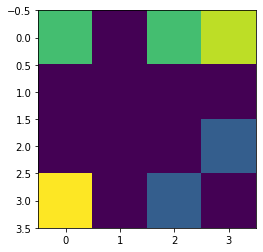

In [25]:
plt.imshow(grid)

In [26]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self):
    self.observation_space = spaces.Discrete(9)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 12
    self.reward = 0
    self.immediate_reward = 0

  def reset(self):
    self.reward = 0
    self.immediate_reward = 0
    self.timestep = 0
    x = np.random.randint(0,3)
    y = np.random.randint(0,3)
    self.agent_pos = [x, y]
    while(self.agent_pos[0] == 0 and self.agent_pos[1] == 3):
      x = np.random.randint(0,3)
      y = np.random.randint(0,3)
      self.agent_pos = [x, y]
    self.goal_pos = [0, 3]
    self.negative_reward_position1 = [3, 2]
    self.negative_reward_position2 = [2, 3]
    self.positive_reward_position1 = [0, 0]
    self.positive_reward_position2 = [0, 2]
    self.state = np.zeros((4, 4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.9
    self.state[tuple(self.negative_reward_position1)] = 0.3
    self.state[tuple(self.negative_reward_position2)] = 0.3
    self.state[tuple(self.positive_reward_position1)] = 0.7
    self.state[tuple(self.positive_reward_position2)] = 0.7
    observation = self.state.flatten()
    print(self.state)
    return observation

  def getAvailableActions(self):
    actions = []
    if(self.agent_pos[0] < 3):
      actions.append(0)
    if(self.agent_pos[0] > 0):
      actions.append(1)
    if(self.agent_pos[1] < 3):
      actions.append(2)
    if(self.agent_pos[1] > 0):
      actions.append(3)
    return actions

    # 0 = down
    # 1 = up
    # 2 = right
    # 3 = left

  def step(self, action):
    self.state = np.random.choice(self.observation_space.n)
    if action == 0 and self.agent_pos[0] < 3:
      self.agent_pos[0] += 1
    if action == 1 and self.agent_pos[0] > 0:
      self.agent_pos[0] -= 1
    if action == 2 and self.agent_pos[1] < 3:
      self.agent_pos[1] += 1
    if action == 3 and self.agent_pos[1] > 0:
      self.agent_pos[1] -= 1
    
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    print("The Agent state is", self.agent_pos)
    self.state = np.zeros((4,4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.9
    self.state[tuple(self.negative_reward_position1)] = 0.3
    self.state[tuple(self.negative_reward_position2)] = 0.3
    self.state[tuple(self.positive_reward_position1)] = 0.7
    self.state[tuple(self.positive_reward_position2)] = 0.7
    observation = self.state.flatten()

    done = False
    if (self.agent_pos == self.negative_reward_position1).all():
      self.immediate_reward = -5
      # self.reward = -5 + self.reward
    elif (self.agent_pos == self.negative_reward_position2).all():
      self.immediate_reward = -6
      # self.reward = -6 + self.reward
    elif (self.agent_pos == self.positive_reward_position1).all():
      self.immediate_reward = 5
      # self.reward = 5 + self.reward
    elif (self.agent_pos == self.positive_reward_position2).all():
      self.immediate_reward = 6
      # self.reward = 6 + self.reward
    elif (self.agent_pos == self.goal_pos).all():
      self.immediate_reward = 50
      # self.reward = 50 + self.reward
      done = True
    else:
      self.immediate_reward = 0.5
      # self.reward = 0.1 + self.reward
    self.reward = self.immediate_reward + self.reward

    self.timestep += 1
    # done = True if self.agent_pos[0] == 0 and self.agent_pos[0] == 3 else False
    info = {}
    print(self.state)

    return observation, self.reward, done, info

  def render(self):
    plt.imshow(self.state)
    plt.show()

[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]


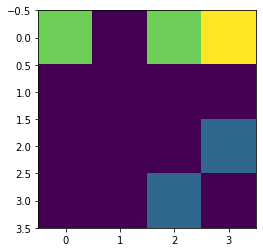

[0.7 0.  0.7 0.9 0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.3 0. ]


In [27]:
from traitlets.traitlets import observe
env = GridEnvironment()
obs = env.reset()
env.render()
print(obs)

The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  50
Action:  2
Visualization Graph


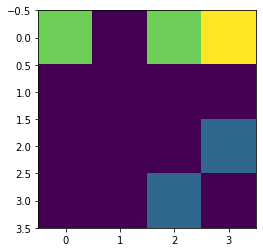

The Agent state is [1 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  1. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  50.5
Action:  0
Visualization Graph


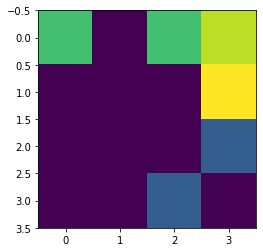

The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  51.0
Action:  3
Visualization Graph


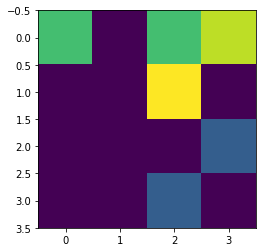

The Agent state is [1 1]
[[0.7 0.  0.7 0.9]
 [0.  1.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  51.5
Action:  3
Visualization Graph


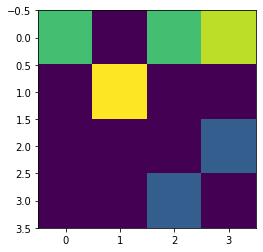

The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  52.0
Action:  2
Visualization Graph


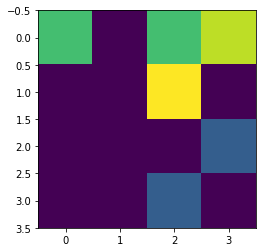

The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  52.5
Action:  0
Visualization Graph


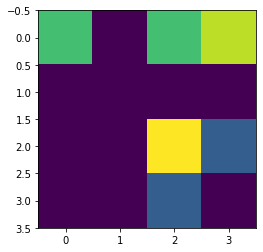

The Agent state is [2 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  46.5
Action:  2
Visualization Graph


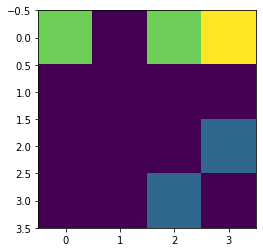

The Agent state is [2 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  40.5
Action:  2
Visualization Graph


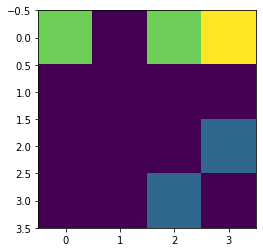

The Agent state is [2 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  34.5
Action:  2
Visualization Graph


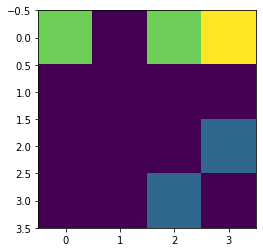

The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  35.0
Action:  3
Visualization Graph


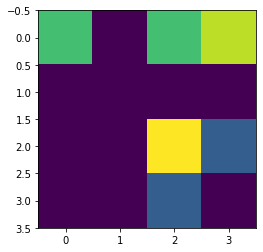

In [28]:
#RANDOM AGENT FOR 10 TIMESTEPS
random_agent = list(range(0,4))

for i in range(10):
  action = np.random.choice(random_agent)
  observation, reward, done, _ = env.step(action)
  print('Reward: ', reward)
  print('Action: ', action)
  print("Visualization Graph")
  env.render()


In [29]:
#Because of overlapping of 2 colors in action, the grid color may change sometimes

PART II

In [30]:
class SARSA_Agent():
  def __init__(self, env, gamma = 1, alpha = 0.01, epsilon = 0.2):
    self.env = env
    self.gamma = gamma
    self.epsilon = epsilon
    self.alpha = alpha

    self.q_table = dict()
    for i in range(4):
      for j in range(4):
        self.q_table[(i,j)] = {0:0, 1:0, 2:0, 3:0}
    self.value_table = np.zeros((4,4))

  def ChooseAction(self, learn_flag):
    actions = self.env.getAvailableActions()
    action = -1;
    eps = -1
    if(learn_flag == True):
      eps = self.epsilon
    if(np.random.uniform(0,1) < eps):
      print('Random Action')
      action = actions[np.random.randint(0,len(actions))]
    else:
      print('Greedy Action')
      q_values = np.array(list(self.q_table[tuple(self.env.agent_pos)].values()))
      available_q_values = []
      for i in actions:
        available_q_values.append(q_values[i])
      max_q_value = max(available_q_values)
      inds = np.where((np.array(available_q_values))== max_q_value)
      indexes = inds[0]
      action = actions[indexes[np.random.randint(0,len(indexes))]]
    return action

  def Learn(self, old_state, old_action, reward, new_state, new_action):
    old_state_q = (self.q_table[tuple(old_state)])
    old_q = old_state_q[old_action]
      
    new_state_q = (self.q_table[tuple(new_state)])
    new_q = new_state_q[new_action]

    self.q_table[tuple(old_state)][old_action] = old_q + (self.alpha * (reward + (self.gamma * new_q) - old_q))
    self.value_table[old_state[0]][old_state[1]] = max(self.q_table[tuple(old_state)].values())

  def reset(self):
    self.env.reset()


Streaming output truncated to the last 5000 lines.
 [0.  0.  0.3 0. ]]
Greedy Action
Reward:  50
Action:  0
Visualization Graph
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  1.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [1 0]
[[0.7 0.  0.7 0.9]
 [1.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [1 0]
[[0.7 0.  0.7 0.9]
 [1.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [1 0]
[[0.7 0.  0.7 0.9]
 [1.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0

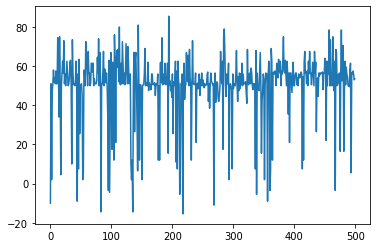

In [31]:
agent = SARSA_Agent(env, gamma=0.1, epsilon= 0.2, alpha = 0.0001)#0.4,0.8,0.01
reward_per_episode = []
obs = agent.reset()
for j in range(500):
  obs = agent.reset()
  # x = np.random.randint(0,3)
  # y = np.random.randint(0,3)
  # env.agent_pos = [x,y]
  # while(env.agent_pos[0] == 0 and env.agent_pos[1] == 3):
  #   x = np.random.randint(0,3)
  #   y = np.random.randint(0,3)
  #   env.agent_pos = [x,y]
  done = False
  action = agent.ChooseAction(True)
  cummulative_reward = 0
  for i in range(15):
    if(done == False):
      old_state = env.agent_pos
      observation, reward, done, _ = env.step(action)
      new_state = env.agent_pos
      new_action = agent.ChooseAction(True)
      agent.Learn(old_state, action, env.immediate_reward, new_state, new_action)
      action = new_action
      cummulative_reward = reward
      if(done == True):
        print('Reward: ', env.immediate_reward)
        print('Action: ', action)
        print("Visualization Graph")
  reward_per_episode.append(cummulative_reward)

plt.plot(reward_per_episode)

New Episode!
[[0.7 0.  0.7 0.9]
 [1.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 1, 2]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  0.5
False
Available Actions :  [0, 1, 2]
Greedy Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Reward:  1.0
False
Available Actions :  [1, 2]
Greedy Action
The Agent state is [3 1]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  1.  0.3 0. ]]
Reward:  1.5
False
Available Actions :  [1, 2, 3]
Greedy Action
The Agent state is [3 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  -3.5
False
Available Actions :  [1, 2, 3]
Greedy Action
The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  -3.0
False
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [1 2]
[[0.7 0.

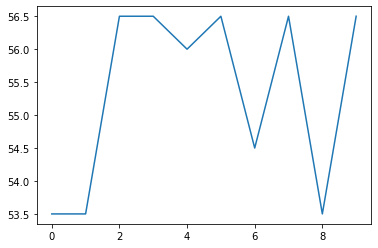

In [32]:
total_reward_per_episode = []
for i in range(0,10):
  print("New Episode!")
  agent.reset()
  done = False
  for j in range(0,25):
    if(done == False):
      print('Available Actions : ', env.getAvailableActions())
      action = agent.ChooseAction(False)
      observation, reward, done, _ = env.step(action)
      print('Reward: ', reward)
      # print('Action: ', action)
      # print("Visualization Graph")
      # env.render()
    else:
      print('Goal Reached')
      break
    print(done)
  total_reward_per_episode.append(reward)
plt.plot(total_reward_per_episode)

In [33]:
print(agent.q_table)

{(0, 0): {0: 0, 1: 0.11320452121643178, 2: 0, 3: 0.00949145484306258}, (0, 1): {0: 0, 1: 0.00015004130014606516, 2: 0.006807628062132694, 3: 0.0009996164552469806}, (0, 2): {0: 0, 1: 0.05025192663215556, 2: 0.1024002376882791, 3: 0}, (0, 3): {0: 0, 1: 0.8821695073380059, 2: 1.2979224014159476, 3: 0}, (1, 0): {0: 0.008336905384924166, 1: 0.008287717404600983, 2: 0, 3: 0.00030020252114272875}, (1, 1): {0: 0.0006497050276619499, 1: 0.0002499854764927557, 2: 0.001298532562926363, 3: 0.0008494855799101522}, (1, 2): {0: 0.0010496638152391296, 1: 0.006462809822132057, 2: 0.0055224078684880835, 3: 0.0006998342718057712}, (1, 3): {0: 0, 1: 0.000149986500405, 2: 0.01009728018448585, 3: 0}, (2, 0): {0: 0.006412632747186144, 1: 0.006165715662286427, 2: 0, 3: 0.0058685511756657}, (2, 1): {0: 0.0001500154563021947, 1: 0.0006997372955980142, 2: 0.0014483608451599668, 3: 0.0018967885299721197}, (2, 2): {0: 0.000899560432329091, 1: 0.00443224251755748, 2: 0.0005497755366235467, 3: 0.0012987024465687862

In [34]:
print(agent.value_table)

[[1.13204521e-01 6.80762806e-03 1.02400238e-01 1.29792240e+00]
 [8.33690538e-03 1.29853256e-03 6.46280982e-03 1.00972802e-02]
 [6.41263275e-03 1.89678853e-03 4.43224252e-03 0.00000000e+00]
 [1.12715793e-02 6.26404330e-03 0.00000000e+00 7.49475227e-04]]


Hyper Parameter 1: 
Gamma Value: 0.2



Streaming output truncated to the last 5000 lines.
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [1 1]
[[0.7 0.  0.7 0.9]
 [0.  1.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [2 1]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  1.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [

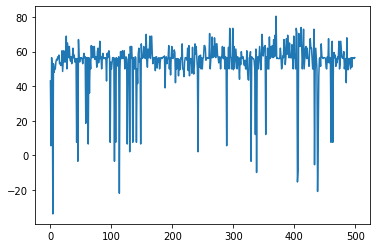

In [35]:
agent = SARSA_Agent(env, gamma=0.2, epsilon= 0.2, alpha = 0.0001)#0.4,0.8,0.01
reward_per_episode = []
obs = agent.reset()
for j in range(500):
  obs = agent.reset()
  # x = np.random.randint(0,3)
  # y = np.random.randint(0,3)
  # env.agent_pos = [x,y]
  # while(env.agent_pos[0] == 0 and env.agent_pos[1] == 3):
  #   x = np.random.randint(0,3)
  #   y = np.random.randint(0,3)
  #   env.agent_pos = [x,y]
  done = False
  action = agent.ChooseAction(True)
  cummulative_reward = 0
  for i in range(15):
    if(done == False):
      old_state = env.agent_pos
      observation, reward, done, _ = env.step(action)
      new_state = env.agent_pos
      new_action = agent.ChooseAction(True)
      agent.Learn(old_state, action, env.immediate_reward, new_state, new_action)
      action = new_action
      cummulative_reward = reward
      if(done == True):
        print('Reward: ', env.immediate_reward)
        print('Action: ', action)
        print("Visualization Graph")
  reward_per_episode.append(cummulative_reward)

plt.plot(reward_per_episode)

New Episode!
[[0.7 0.  0.7 0.9]
 [1.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 1, 2]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  0.5
False
Available Actions :  [0, 1, 2]
Greedy Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Reward:  1.0
False
Available Actions :  [1, 2]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  1.5
False
Available Actions :  [0, 1, 2]
Greedy Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Reward:  2.0
False
Available Actions :  [1, 2]
Greedy Action
The Agent state is [3 1]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  1.  0.3 0. ]]
Reward:  2.5
False
Available Actions :  [1, 2, 3]
Greedy Action
The Agent state is [3 2]
[[0.7 0.  0.7 0.

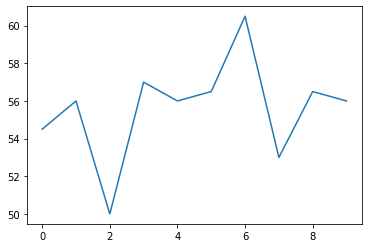

In [36]:
total_reward_per_episode = []
for i in range(0,10):
  print("New Episode!")
  agent.reset()
  done = False
  for j in range(0,25):
    if(done == False):
      print('Available Actions : ', env.getAvailableActions())
      action = agent.ChooseAction(False)
      observation, reward, done, _ = env.step(action)
      print('Reward: ', reward)
      # print('Action: ', action)
      # print("Visualization Graph")
      # env.render()
    else:
      print('Goal Reached')
      break
    print(done)
  total_reward_per_episode.append(reward)
plt.plot(total_reward_per_episode)

In [37]:
print(agent.q_table)

{(0, 0): {0: 0, 1: 0.034879523242157, 2: 0, 3: 0.008493203398810309}, (0, 1): {0: 0, 1: 0.0006996700574016584, 2: 0.0040866109624371014, 3: 0.002046908414484544}, (0, 2): {0: 0, 1: 0.18975073789109453, 2: 0.08944599843360407, 3: 0}, (0, 3): {0: 0, 1: 0.13482464616229037, 2: 2.1763264102054682, 3: 0}, (1, 0): {0: 0.0030923235765126116, 1: 0.0029930073596866687, 2: 0, 3: 0.0027443060425107646}, (1, 1): {0: 0.000549878928486891, 1: 0.00024996400188000443, 2: 0.0009493312866177501, 3: 0.001049151434043568}, (1, 2): {0: 0.001900813881089341, 1: 0.012713532822021445, 2: 0.0023998262002970505, 3: 5.023369668950741e-05}, (1, 3): {0: 0, 1: 0.0001999760012799744, 2: 0.0011986829424764634, 3: 0}, (2, 0): {0: 0.007158245704447852, 1: 0.006713809793957964, 2: 0, 3: 0.0005503108230675879}, (2, 1): {0: 0.00015005892290992048, 1: 0.0005499108687814855, 2: 0.0013984790670777774, 3: 0.0009493821616461027}, (2, 2): {0: 0.0010004635269161817, 1: 0.005970506888738051, 2: 0.005030554811998743, 3: 0.00080044

In [38]:
print(agent.value_table)

[[3.48795232e-02 4.08661096e-03 1.89750738e-01 2.17632641e+00]
 [3.09232358e-03 1.04915143e-03 1.27135328e-02 1.19868294e-03]
 [7.15824570e-03 1.39847907e-03 5.97050689e-03 0.00000000e+00]
 [1.26869092e-02 6.46527278e-03 0.00000000e+00 8.49320340e-04]]


Hyper Parameter 1: 
Gamma Value: 0.3

Streaming output truncated to the last 5000 lines.
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Random Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Greedy Action
The Agent state is [3 1]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  1.  0.3 0. ]]
Greedy Action
The Agent state is [3 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [3 1]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  1.  0.3 0. ]]
Greedy Action
The Agent state is [3 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [

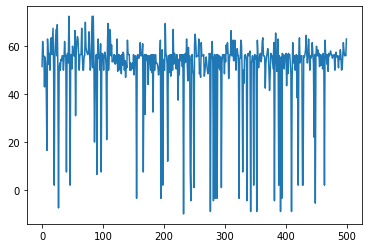

In [39]:
agent = SARSA_Agent(env, gamma=0.3, epsilon= 0.2, alpha = 0.0001)#0.4,0.8,0.01
reward_per_episode = []
obs = agent.reset()
for j in range(500):
  obs = agent.reset()
  # x = np.random.randint(0,3)
  # y = np.random.randint(0,3)
  # env.agent_pos = [x,y]
  # while(env.agent_pos[0] == 0 and env.agent_pos[1] == 3):
  #   x = np.random.randint(0,3)
  #   y = np.random.randint(0,3)
  #   env.agent_pos = [x,y]
  done = False
  action = agent.ChooseAction(True)
  cummulative_reward = 0
  for i in range(15):
    if(done == False):
      old_state = env.agent_pos
      observation, reward, done, _ = env.step(action)
      new_state = env.agent_pos
      new_action = agent.ChooseAction(True)
      agent.Learn(old_state, action, env.immediate_reward, new_state, new_action)
      action = new_action
      cummulative_reward = reward
      if(done == True):
        print('Reward: ', env.immediate_reward)
        print('Action: ', action)
        print("Visualization Graph")
  reward_per_episode.append(cummulative_reward)

plt.plot(reward_per_episode)

New Episode!
[[0.7 1.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 2, 3]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  6
False
Available Actions :  [0, 2, 3]
Greedy Action
The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  56
True
Goal Reached
New Episode!
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  1.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  0.5
False
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  1.0
False
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0

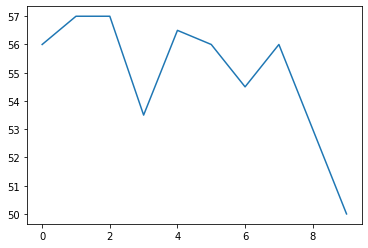

In [40]:
total_reward_per_episode = []
for i in range(0,10):
  print("New Episode!")
  agent.reset()
  done = False
  for j in range(0,25):
    if(done == False):
      print('Available Actions : ', env.getAvailableActions())
      action = agent.ChooseAction(False)
      observation, reward, done, _ = env.step(action)
      print('Reward: ', reward)
      # print('Action: ', action)
      # print("Visualization Graph")
      # env.render()
    else:
      print('Goal Reached')
      break
    print(done)
  total_reward_per_episode.append(reward)
plt.plot(total_reward_per_episode)

In [41]:
print(agent.q_table)

{(0, 0): {0: 0, 1: 0.029414612317687102, 2: 0, 3: 0.00599670109975254}, (0, 1): {0: 0, 1: 0.0009497085596320289, 2: 0.002893981371821428, 3: 0.0012997064087570537}, (0, 2): {0: 0, 1: 0.18935159188241893, 2: 0.07823234916130642, 3: 0}, (0, 3): {0: 0, 1: 0.09491454843062581, 2: 2.1524073981853697, 3: 0}, (1, 0): {0: 0.003540923300137849, 1: 0.0027450851170744833, 2: 0, 3: 0.0032443085791310643}, (1, 1): {0: 0.0005998259965586161, 1: 0.000549849502785114, 2: 0.000549873478526448, 3: 0.0009993202989294608}, (1, 2): {0: 0.0015035857456524898, 1: 0.014491372508803961, 2: 0.00015064093104310842, 3: 0.00010073202935003466}, (1, 3): {0: 0, 1: 9.99965e-05, 2: 0.001098878744267187, 3: 0}, (2, 0): {0: 0.00879420133998317, 1: 0.0076615728372733585, 2: 0, 3: 0.0007006015740804833}, (2, 1): {0: 0.0008994572119474486, 1: 0.0006997475171668911, 2: 0.0010992278009743298, 3: 0.0006498379387291517}, (2, 2): {0: 0.0006515310548907109, 1: 0.010910420772936191, 2: 0.002303678308830551, 3: 0.00160202642826014

In [42]:
print(agent.value_table)

[[2.94146123e-02 2.89398137e-03 1.89351592e-01 2.15240740e+00]
 [3.54092330e-03 9.99320299e-04 1.44913725e-02 1.09887874e-03]
 [8.79420134e-03 1.09922780e-03 1.09104208e-02 0.00000000e+00]
 [1.60379627e-02 9.68069204e-03 0.00000000e+00 9.49145484e-04]]


Hyper Parameter 1: 
Gamma Value: 0.4

Streaming output truncated to the last 5000 lines.
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [0 1]
[[0.7 1.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
Reward:  50
Action:  0
Visualization Graph
[[0.7 1.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0

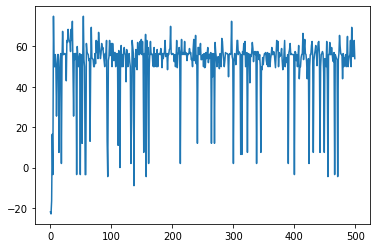

In [43]:
agent = SARSA_Agent(env, gamma=0.4, epsilon= 0.2, alpha = 0.0001)#0.4,0.8,0.01
reward_per_episode = []
obs = agent.reset()
for j in range(500):
  obs = agent.reset()
  # x = np.random.randint(0,3)
  # y = np.random.randint(0,3)
  # env.agent_pos = [x,y]
  # while(env.agent_pos[0] == 0 and env.agent_pos[1] == 3):
  #   x = np.random.randint(0,3)
  #   y = np.random.randint(0,3)
  #   env.agent_pos = [x,y]
  done = False
  action = agent.ChooseAction(True)
  cummulative_reward = 0
  for i in range(15):
    if(done == False):
      old_state = env.agent_pos
      observation, reward, done, _ = env.step(action)
      new_state = env.agent_pos
      new_action = agent.ChooseAction(True)
      agent.Learn(old_state, action, env.immediate_reward, new_state, new_action)
      action = new_action
      cummulative_reward = reward
      if(done == True):
        print('Reward: ', env.immediate_reward)
        print('Action: ', action)
        print("Visualization Graph")
  reward_per_episode.append(cummulative_reward)

plt.plot(reward_per_episode)

New Episode!
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  1.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  0.5
False
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  1.0
False
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  7.0
False
Available Actions :  [0, 2, 3]
Greedy Action
The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  57.0
True
Goal Reached
New Episode!
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.

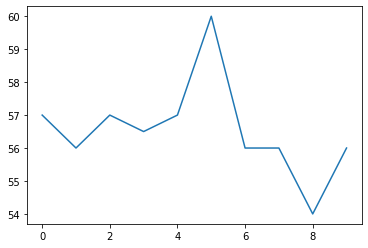

In [44]:
total_reward_per_episode = []
for i in range(0,10):
  print("New Episode!")
  agent.reset()
  done = False
  for j in range(0,25):
    if(done == False):
      print('Available Actions : ', env.getAvailableActions())
      action = agent.ChooseAction(False)
      observation, reward, done, _ = env.step(action)
      print('Reward: ', reward)
      # print('Action: ', action)
      # print("Visualization Graph")
      # env.render()
    else:
      print('Goal Reached')
      break
    print(done)
  total_reward_per_episode.append(reward)
plt.plot(total_reward_per_episode)

In [45]:
print(agent.q_table)

{(0, 0): {0: 0, 1: 0.020459053249402455, 2: 0, 3: 0.0049977505998950135}, (0, 1): {0: 0, 1: 0.0004002415502893873, 2: 0.00224689687720395, 3: 0.0019484079431253882}, (0, 2): {0: 0, 1: 0.20512273257498545, 2: 0.073501742523337, 3: 0}, (0, 3): {0: 0, 1: 0.05497250824835023, 2: 2.1763264102054682, 3: 0}, (1, 0): {0: 0.002496098885134865, 1: 0.002296879534614111, 2: 0, 3: 0.004287401495432219}, (1, 1): {0: 0.0005999578689259781, 1: 0.0002501258793708359, 2: 0.00114931518675603, 3: 0.0011991244256852156}, (1, 2): {0: 0.0016059897996544338, 1: 0.015052544425794318, 2: 0.0011033950802114686, 3: 5.001399700036078e-05}, (1, 3): {0: 0, 1: 5e-05, 2: 0.0006496201409644563, 3: 0}, (2, 0): {0: 0.00825716943450181, 1: 0.007664183799390684, 2: 0, 3: 0.0014992679365453826}, (2, 1): {0: 0.0006500616657982017, 1: 0.0010496457565794908, 2: 0.0018479574410171027, 3: 0.000999733666373096}, (2, 2): {0: 0.0008512616227711915, 1: 0.008256849124460766, 2: 0.005039562648643903, 3: 0.0012520863621276188}, (2, 3):

In [46]:
print(agent.value_table)

[[2.04590532e-02 2.24689688e-03 2.05122733e-01 2.17632641e+00]
 [4.28740150e-03 1.19912443e-03 1.50525444e-02 6.49620141e-04]
 [8.25716943e-03 1.84795744e-03 8.25684912e-03 0.00000000e+00]
 [1.63766345e-02 8.94781732e-03 0.00000000e+00 8.99235408e-04]]


Hyper Parameter 2: 
Epsilon Value: 0.1

Streaming output truncated to the last 5000 lines.
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
Reward:  50
Action:  3
Visualization Graph
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  1.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Random Action
The Agent state is [3 1]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0

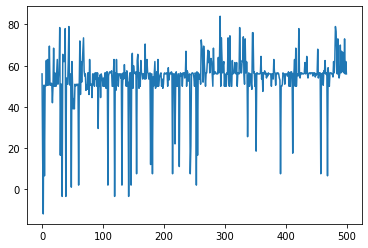

In [47]:
agent = SARSA_Agent(env, gamma=0.1, epsilon= 0.1, alpha = 0.0001)#0.4,0.8,0.01
reward_per_episode = []
obs = agent.reset()
for j in range(500):
  obs = agent.reset()
  # x = np.random.randint(0,3)
  # y = np.random.randint(0,3)
  # env.agent_pos = [x,y]
  # while(env.agent_pos[0] == 0 and env.agent_pos[1] == 3):
  #   x = np.random.randint(0,3)
  #   y = np.random.randint(0,3)
  #   env.agent_pos = [x,y]
  done = False
  action = agent.ChooseAction(True)
  cummulative_reward = 0
  for i in range(15):
    if(done == False):
      old_state = env.agent_pos
      observation, reward, done, _ = env.step(action)
      new_state = env.agent_pos
      new_action = agent.ChooseAction(True)
      agent.Learn(old_state, action, env.immediate_reward, new_state, new_action)
      action = new_action
      cummulative_reward = reward
      if(done == True):
        print('Reward: ', env.immediate_reward)
        print('Action: ', action)
        print("Visualization Graph")
  reward_per_episode.append(cummulative_reward)

plt.plot(reward_per_episode)

New Episode!
[[0.7 0.  0.7 0.9]
 [0.  1.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  0.5
False
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  6.5
False
Available Actions :  [0, 2, 3]
Greedy Action
The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  56.5
True
Goal Reached
New Episode!
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  6
False
Available Actions :  [0, 2, 3]
Greedy Action
The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0. 

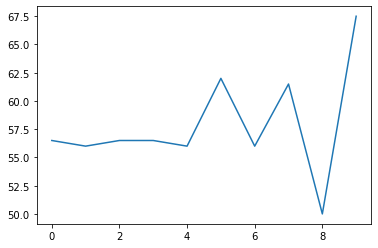

In [48]:
total_reward_per_episode = []
for i in range(0,10):
  print("New Episode!")
  agent.reset()
  done = False
  for j in range(0,25):
    if(done == False):
      print('Available Actions : ', env.getAvailableActions())
      action = agent.ChooseAction(False)
      observation, reward, done, _ = env.step(action)
      print('Reward: ', reward)
      # print('Action: ', action)
      # print("Visualization Graph")
      # env.render()
    else:
      print('Goal Reached')
      break
    print(done)
  total_reward_per_episode.append(reward)
plt.plot(total_reward_per_episode)

In [49]:
print(agent.q_table)

{(0, 0): {0: 0, 1: 0.07050177780510004, 2: 0, 3: 0.00599670109975254}, (0, 1): {0: 0, 1: 9.99989992600594e-05, 2: 0.004928059585372055, 3: 0.001099408533133062}, (0, 2): {0: 0, 1: 0.1476793533023757, 2: 0.09767397477079354, 3: 0}, (0, 3): {0: 0, 1: 0.24441292014157273, 2: 2.0661998575438494, 3: 0}, (1, 0): {0: 0.005324604082719635, 1: 0.005373941264880942, 2: 0, 3: 0.0002499958901808303}, (1, 1): {0: 0.00029995049395488524, 1: 0.0003998970009073402, 2: 0.0007495281836106055, 3: 0.00044985851359505144}, (1, 2): {0: 0.0006001547257693008, 1: 0.007745491980600451, 2: 0.004284825100728604, 3: 5e-05}, (1, 3): {0: 0, 1: 5e-05, 2: 0.002543659839315987, 3: 0}, (2, 0): {0: 0.00611629518060334, 1: 0.006116354239665699, 2: 0, 3: 0.0035891636452505676}, (2, 1): {0: 0.00010000199693587148, 1: 0.0004998200241848725, 2: 0.0005497720454388543, 3: 0.0005997035888069227}, (2, 2): {0: 0.00035005990918742007, 1: 0.005522470712225982, 2: 0.00030001726760442107, 3: 0.0004999659320513922}, (2, 3): {0: -0.001

In [50]:
print(agent.value_table)

[[7.05017778e-02 4.92805959e-03 1.47679353e-01 2.06619986e+00]
 [5.37394126e-03 7.49528184e-04 7.74549198e-03 2.54365984e-03]
 [6.11635424e-03 5.99703589e-04 5.52247071e-03 0.00000000e+00]
 [1.21993280e-02 6.31375171e-03 0.00000000e+00 3.99860028e-04]]


Hyper Parameter 2: 
Epsilon Value: 0.3

Streaming output truncated to the last 5000 lines.
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [0 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [1 0]
[[0.7 0.  0.7 0.9]
 [1.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [2 1]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  1.  0.  0.3]
 [0.  0.  0.3 0. ]]
R

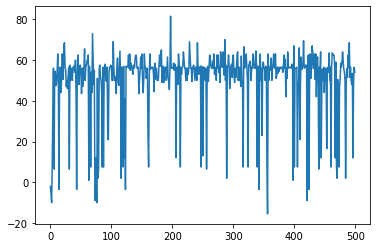

In [51]:
agent = SARSA_Agent(env, gamma=0.1, epsilon= 0.3, alpha = 0.0001)#0.4,0.8,0.01
reward_per_episode = []
obs = agent.reset()
for j in range(500):
  obs = agent.reset()
  # x = np.random.randint(0,3)
  # y = np.random.randint(0,3)
  # env.agent_pos = [x,y]
  # while(env.agent_pos[0] == 0 and env.agent_pos[1] == 3):
  #   x = np.random.randint(0,3)
  #   y = np.random.randint(0,3)
  #   env.agent_pos = [x,y]
  done = False
  action = agent.ChooseAction(True)
  cummulative_reward = 0
  for i in range(15):
    if(done == False):
      old_state = env.agent_pos
      observation, reward, done, _ = env.step(action)
      new_state = env.agent_pos
      new_action = agent.ChooseAction(True)
      agent.Learn(old_state, action, env.immediate_reward, new_state, new_action)
      action = new_action
      cummulative_reward = reward
      if(done == True):
        print('Reward: ', env.immediate_reward)
        print('Action: ', action)
        print("Visualization Graph")
  reward_per_episode.append(cummulative_reward)

plt.plot(reward_per_episode)

New Episode!
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 2]
Greedy Action
The Agent state is [1 0]
[[0.7 0.  0.7 0.9]
 [1.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  0.5
False
Available Actions :  [0, 1, 2]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  1.0
False
Available Actions :  [0, 1, 2]
Greedy Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Reward:  1.5
False
Available Actions :  [1, 2]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  2.0
False
Available Actions :  [0, 1, 2]
Greedy Action
The Agent state is [3 0]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [1.  0.  0.3 0. ]]
Reward:  2.5
False
Available Actions :  [1, 2]
Greedy Action
The Agent state is [2 0]
[[0.7 0.  0.7 0.9]


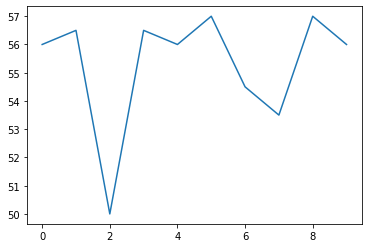

In [52]:
total_reward_per_episode = []
for i in range(0,10):
  print("New Episode!")
  agent.reset()
  done = False
  for j in range(0,25):
    if(done == False):
      print('Available Actions : ', env.getAvailableActions())
      action = agent.ChooseAction(False)
      observation, reward, done, _ = env.step(action)
      print('Reward: ', reward)
      # print('Action: ', action)
      # print("Visualization Graph")
      # env.render()
    else:
      print('Goal Reached')
      break
    print(done)
  total_reward_per_episode.append(reward)
plt.plot(total_reward_per_episode)

In [53]:
print(agent.q_table)

{(0, 0): {0: 0, 1: 0.013981116369767413, 2: 0, 3: 0.02245057087556356}, (0, 1): {0: 0, 1: 0.003985276725330408, 2: 0.003439294313163096, 3: 0.0022455794264962478}, (0, 2): {0: 0, 1: 0.16870693235705503, 2: 0.10711784271762433, 3: 0}, (0, 3): {0: 0, 1: 0.15476772459275992, 2: 2.0230378592941243, 3: 0}, (1, 0): {0: 0.0028924957772312144, 1: 0.002643844166286665, 2: 0, 3: 0.0026937453029988504}, (1, 1): {0: 0.0012986243148090523, 1: 0.0013983038048543497, 2: 0.0010990533874292532, 3: 0.0020961684829396477}, (1, 2): {0: 0.00264546857014302, 1: 0.012699082901384183, 2: 0.001199320027099864, 3: 0.00015002187970906763}, (1, 3): {0: 0, 1: 0.000149986500405, 2: 0.0018466943543541555, 3: 0}, (2, 0): {0: 0.008090158613757682, 1: 0.007499140757416516, 2: 0, 3: 0.0003499847457829237}, (2, 1): {0: 0.0006996165994880882, 1: 0.0009492772935675195, 2: 0.0016974639464393915, 3: 0.001049111908944964}, (2, 2): {0: 0.0012991460381309601, 1: 0.007103889877855574, 2: 0.003242250972669139, 3: 0.00174814773155

In [54]:
print(agent.value_table)

[[2.24505709e-02 3.98527673e-03 1.68706932e-01 2.02303786e+00]
 [2.89249578e-03 2.09616848e-03 1.26990829e-02 1.84669435e-03]
 [8.09015861e-03 1.69746395e-03 7.10388988e-03 0.00000000e+00]
 [1.36606101e-02 6.90612617e-03 0.00000000e+00 1.19862101e-03]]


Hyper Parameter 2: 
Epsilon Value: 0.4

Streaming output truncated to the last 5000 lines.
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
The Agent state is [0 3]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Greedy Action
Reward:  50
Action:  3
Visualization Graph
[[0.7 0.  0.7 0.9]
 [0.  1.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Random Action
The Agent state is [1 0]
[[0.7 0.  0.7 0.9]
 [1

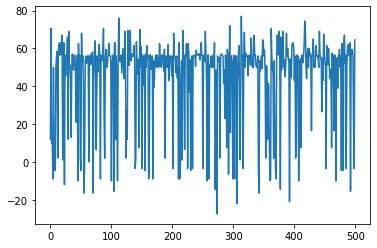

In [55]:
agent = SARSA_Agent(env, gamma=0.1, epsilon= 0.4, alpha = 0.0001)#0.4,0.8,0.01
reward_per_episode = []
obs = agent.reset()
for j in range(500):
  obs = agent.reset()
  # x = np.random.randint(0,3)
  # y = np.random.randint(0,3)
  # env.agent_pos = [x,y]
  # while(env.agent_pos[0] == 0 and env.agent_pos[1] == 3):
  #   x = np.random.randint(0,3)
  #   y = np.random.randint(0,3)
  #   env.agent_pos = [x,y]
  done = False
  action = agent.ChooseAction(True)
  cummulative_reward = 0
  for i in range(15):
    if(done == False):
      old_state = env.agent_pos
      observation, reward, done, _ = env.step(action)
      new_state = env.agent_pos
      new_action = agent.ChooseAction(True)
      agent.Learn(old_state, action, env.immediate_reward, new_state, new_action)
      action = new_action
      cummulative_reward = reward
      if(done == True):
        print('Reward: ', env.immediate_reward)
        print('Action: ', action)
        print("Visualization Graph")
  reward_per_episode.append(cummulative_reward)

plt.plot(reward_per_episode)

New Episode!
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  1.  0.  0.3]
 [0.  0.  0.3 0. ]]
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [3 1]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  1.  0.3 0. ]]
Reward:  0.5
False
Available Actions :  [1, 2, 3]
Greedy Action
The Agent state is [3 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  -4.5
False
Available Actions :  [1, 2, 3]
Greedy Action
The Agent state is [2 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  1.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  -4.0
False
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [1 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  1.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  -3.5
False
Available Actions :  [0, 1, 2, 3]
Greedy Action
The Agent state is [0 2]
[[0.7 0.  0.7 0.9]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.3]
 [0.  0.  0.3 0. ]]
Reward:  2.5
False
Available Actions :  [0, 2, 3]
Greedy Action
The Agent state is [0 3

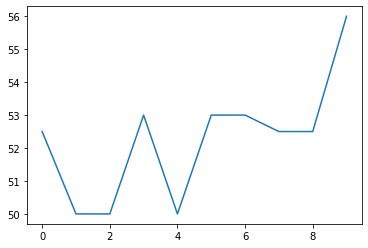

In [56]:
total_reward_per_episode = []
for i in range(0,10):
  print("New Episode!")
  agent.reset()
  done = False
  for j in range(0,25):
    if(done == False):
      print('Available Actions : ', env.getAvailableActions())
      action = agent.ChooseAction(False)
      observation, reward, done, _ = env.step(action)
      print('Reward: ', reward)
      # print('Action: ', action)
      # print("Visualization Graph")
      # env.render()
    else:
      print('Goal Reached')
      break
    print(done)
  total_reward_per_episode.append(reward)
plt.plot(total_reward_per_episode)

In [57]:
print(agent.q_table)

{(0, 0): {0: 0, 1: 0.0358724976863038, 2: 0, 3: 0.01697197989682591}, (0, 1): {0: 0, 1: 0.000849639258951836, 2: 0.004233518361804278, 3: 0.0028926481125099964}, (0, 2): {0: 0, 1: 0.17977219511212497, 2: 0.0852372897260862, 3: 0}, (0, 3): {0: 0, 1: 0.15476772459275992, 2: 1.8259186401376302, 3: 0}, (1, 0): {0: 0.00393609274834286, 1: 0.00383666686615733, 2: 0, 3: 0.000899439834172654}, (1, 1): {0: 0.0019466303206310423, 1: 0.0015479800934895891, 2: 0.0014482866356632655, 3: 0.001597831805166194}, (1, 2): {0: 0.003043873394922006, 1: 0.013675040088347966, 2: 0.0012001111390640572, 3: 0.00030012461672700153}, (1, 3): {0: 0, 1: 0.0005497455703469804, 2: 0.0015975973742755848, 3: 0}, (2, 0): {0: 0.005819043834803309, 1: 0.005720354361675409, 2: 0, 3: 0.0018476148068850909}, (2, 1): {0: 0.006115704474627115, 1: 0.0022959408333591575, 2: 0.0020966370974165194, 3: 0.002445493224158537}, (2, 2): {0: 0.002545499279427561, 1: 0.012649493695290457, 2: 0.0012493969985091008, 3: 0.00239689778693611

In [58]:
print(agent.value_table)

[[3.58724977e-02 4.23351836e-03 1.79772195e-01 1.82591864e+00]
 [3.93609275e-03 1.94663032e-03 1.36750401e-02 1.59759737e-03]
 [5.81904383e-03 6.11570447e-03 1.26494937e-02 0.00000000e+00]
 [9.36172114e-03 1.03963616e-02 0.00000000e+00 1.59752248e-03]]


References

In [59]:
#1) CSE 574 - Prof. Alina's Code
#2) https://www.youtube.com/watch?v=2-OljVM15gc&t=208s